In [36]:
import sys

root_path = r'C:\Users\SWECSAT056\Documents\KonaAI_ML\code'
if root_path not in sys.path:
    sys.path.append(root_path)

from IPython.core.interactiveshell import InteractiveShell

# Set InteractiveShell to show all outputs
InteractiveShell.ast_node_interactivity = "all"

In [44]:
import pandas as pd

X = pd.read_parquet(r'C:\Users\SWECSAT056\Downloads\payments_training_data_X.parquet')
y = pd.read_parquet(r'C:\Users\SWECSAT056\Downloads\payments_training_data_y.parquet')
y = y['target']

In [45]:
X['target'] = y
X['POC_Flagged'].value_counts()

POC_Flagged
     487
X     49
Name: count, dtype: Int64

In [5]:
X[X['target'] == 1]['POC_Flagged'].value_counts()

POC_Flagged
X    8
     7
Name: count, dtype: Int64

In [46]:
from IPython.display import display, HTML
import textwrap
def long_list_display(lst : list, n : int = 10):
    text = ",  ".join([str(x) for x in lst])
    wrapped_text = textwrap.fill(text, width=150)
    html_wrapped_text = f"<div style='white-space: pre-wrap;'>{wrapped_text}</div>"
    display(HTML(html_wrapped_text))

def remove_feature(name:str, _df:pd.DataFrame):
    removable_pattern = ['_grd', 'tests', 'spt_', '_score', 'date', 'RowNumber', 'Rank', 'P2P_Single_UDM_Prediction', 'PostingKey', 'address', 'InvoiceID', 'AddlPaymentID', 'InvoiceLineRef', 'OneYearLookback', 'POC_Flagged', 'DebitCreditIndicator', 'VendorNumber', 'CompanyCode', 'FiscalYear']
    if any(pattern.lower() in name.lower() for pattern in removable_pattern):
        return True

    ncount = _df[name].nunique()
    if ncount == 1:
        return True
    
    if ncount/len(_df) >= 0.5 and not pd.api.types.is_numeric_dtype(_df[name]):
        return True

    return False

cols_to_remove = [col for col in X.columns if remove_feature(col, X)]
print('Cols to Remove')
long_list_display(cols_to_remove)

Cols to Remove


In [47]:
print('Remaining Cols')
remaining_cols = [col for col in X.columns if col not in cols_to_remove]
print(len(remaining_cols))

X = X[remaining_cols]
long_list_display(remaining_cols)

Remaining Cols
46


In [48]:
import textwrap

# find categorical columns
cat_cols = [col for col in X.columns if isinstance(X[col].dtype, pd.CategoricalDtype) or X[col].dtype.name in ['object', 'category', 'string', 'str']]
print('Categorical Columns')
long_list_display(cat_cols)

Categorical Columns


In [49]:
# Strip all values in categorical columns
for col in cat_cols:
    X[col] = X[col].str.strip()

In [59]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

remaining_types = [col for col in X.columns if col not in cat_cols]
print('Remaining Types')
long_list_display(remaining_types)

@interact
def show_continuous_distribution(feature=remaining_types):
    feature_data = X[[feature, 'target']].copy()
    print(f'Min Value : {feature_data[feature].min()}')
    print(f'Max Value : {feature_data[feature].max()}')

    # Create a figure
    fig = go.Figure()
    fig.data = []

    # Create interactive histograms using Plotly Express
    fig = px.histogram(feature_data, x=feature, color='target', facet_row='target', barmode='overlay', nbins=30, text_auto=True)
    # Customize the plot
    fig.update_layout(
        height=600,
        # title_text='Interactive Histograms of Feature by Target',
        xaxis_title_text=feature,
        yaxis_title_text='Count',
        bargap=0.2
    )

    # Show the plot
    fig.show()

Remaining Types


interactive(children=(Dropdown(description='feature', options=('AmountIncl_LC', 'AmountExcl_LC', 'AmountIncl_O…

In [34]:
import numpy as np
# Replace empty strings with NaN
X = X.replace(r'^\s*$', np.nan, regex=True)

# one hot encode all categorical columns
X = pd.get_dummies(X, columns=cat_cols, dummy_na=False)
X.head()

,AmountIncl_LC,AmountExcl_LC,AmountIncl_OC,AmountExcl_OC,IsDuplicateFlagged,DocumentType_DZ-Customer Payment,DocumentType_KA-Vendor Document,DocumentType_KR-Vendor Invoice,DocumentType_KZ-Vendor Payment,DocumentType_RE-Invoice - Gross,...,FMP2P060_9,FMP2P227_False,FMP2P227_True,FMP2P069_21,FMP2P220_5,FMP2P224_False,FMP2P224_True,FMP2P230_False,FMP2P230_True,RawMaterialVendor_X
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,
2,884418.90,884418.90,884418.9,884418.9,False,False,False,False,False,True,...,False,True,False,False,False,True,False,True,False,False
3,261207.95,261207.95,1902600.0,1902600.0,False,False,False,False,False,True,...,False,True,False,False,False,True,False,True,False,False
9,3475.00,3475.00,3475.0,3475.0,False,False,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
10,4520000.00,4520000.00,4520000.0,4520000.0,False,False,False,False,False,True,...,False,True,False,False,False,True,False,True,False,False
11,16848355.00,16848355.00,16848355.0,16848355.0,False,False,False,False,False,True,...,False,True,False,False,False,True,False,True,False,False


In [14]:
# Remove all features that have word False in them
cols_to_remove = [col for col in X.columns if 'False'.lower() in col.lower()]
print('Cols to Remove')
long_list_display(cols_to_remove)
X = X.drop(cols_to_remove, axis=1)

cols_to_remove = [col for col in X.columns if remove_feature(col, X)]
long_list_display(cols_to_remove)
X = X.drop(cols_to_remove, axis=1)

# remove all columns where target is 1 and column values are all false
cols_to_remove = []
for col in X.columns:
    if y[X[col] == 1].sum() < 1:
        cols_to_remove.append(col)
print('Cols to Remove')
long_list_display(cols_to_remove)
X = X.drop(cols_to_remove, axis=1)

Cols to Remove


Cols to Remove


In [15]:
from src.automl.feature_selection import FeatureSelection

fs = FeatureSelection(submodule=None)
to_drop = fs._selection_by_correlation(X, y)

X = X.drop(to_drop, axis=1)

print('Total Closed Transactions:', len(y))
print('Total Concern Transactions:', y.sum())




12:11:08 - INFO - IN_PROGRESS - Starting feature selection by correlation - submodule: None - [C:\Users\SWECSAT056\Documents\KonaAI_ML\code\src\utils\status.py:46]


Total Closed Transactions: 536
Total Concern Transactions: 15


## Feature Importance

<Axes: ylabel='feature'>

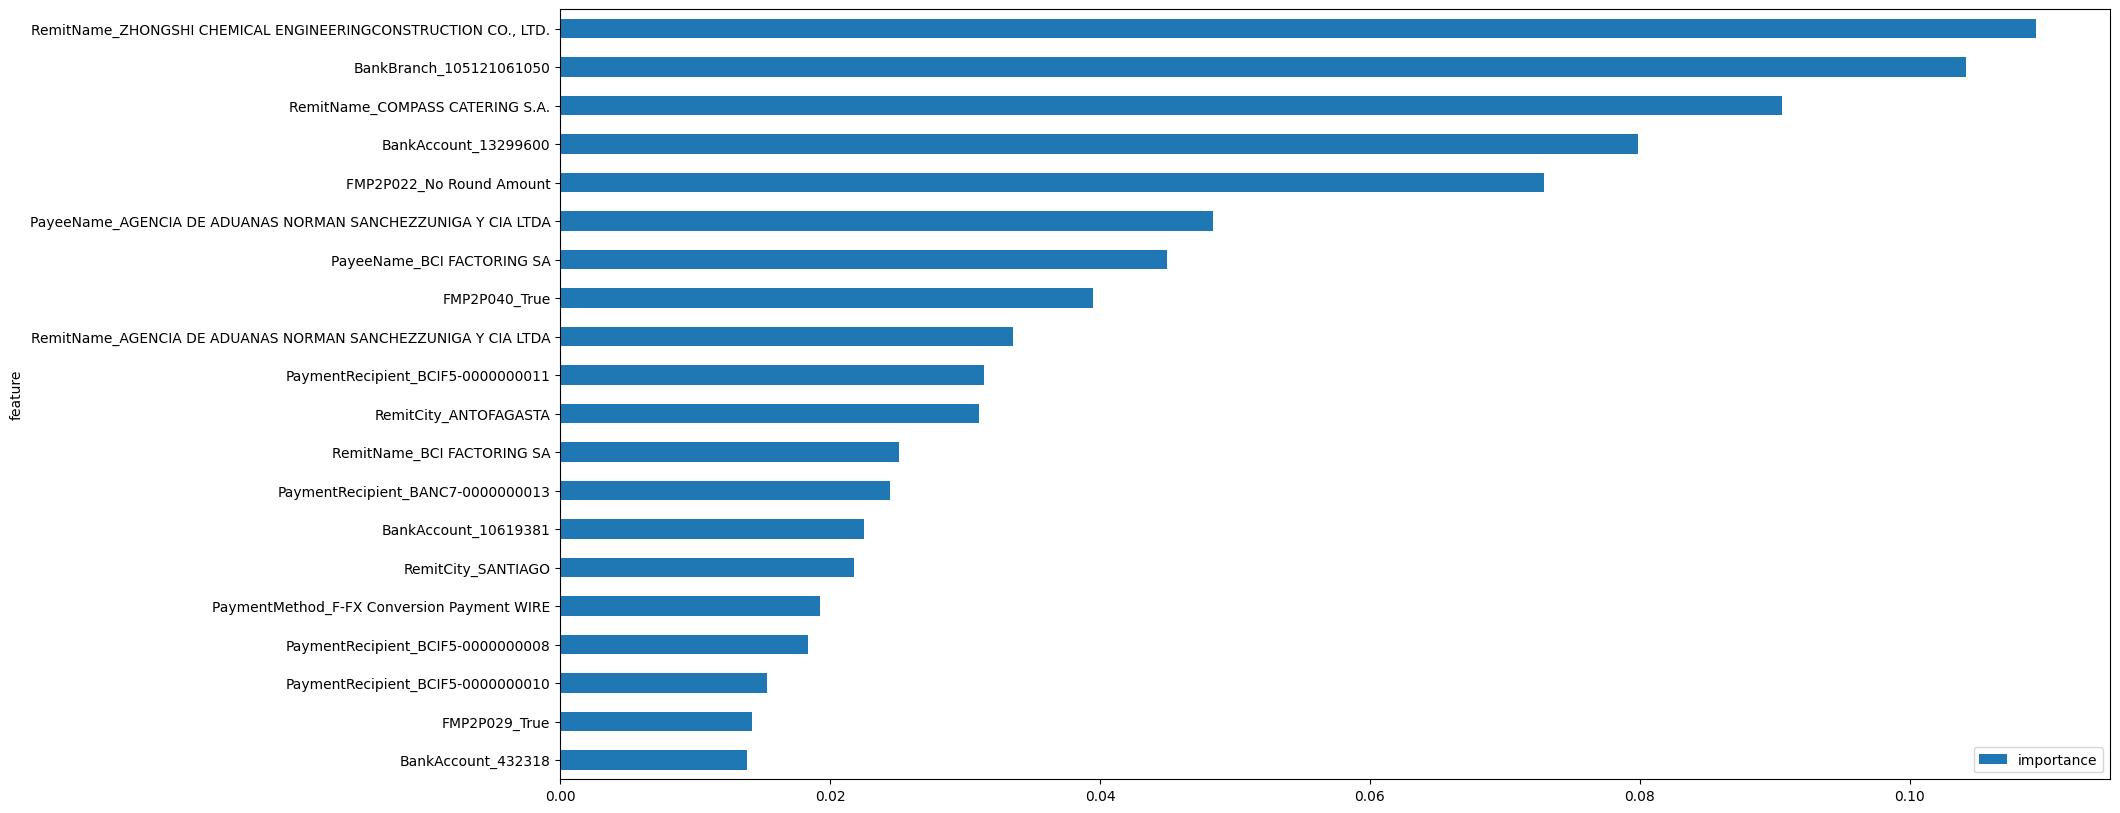

In [19]:
# import randomforest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE



# split data into train and test using stratified shuffle split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# generate synthetic samples using SMOTE
smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

# create a pipeline
clf = RandomForestClassifier(random_state=42)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

# print feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_}).sort_values(by='importance', ascending=True)

feature_importance.to_excel('feature_importance.xlsx', index=False)

# only keep top 15 features
feature_importance = feature_importance.tail(20)

# remove all importances that are zero
# feature_importance = feature_importance[feature_importance['importance'] > 0.0001]

feature_importance.plot(kind='barh', x='feature', y='importance', figsize=(20, 10))



In [26]:
bool_types = [col for col in X.columns if pd.api.types.is_bool_dtype(X[col])]
X['target'] = y

# get count of all boolean columns based on target
bool_counts = []
for col in bool_types:
    bool_counts.append(X[X[col] == 1]['target'].sum())

bool_counts = pd.DataFrame({'feature': bool_types, 'count': bool_counts}).sort_values(by='count', ascending=False)
bool_counts

,feature,count
39,FMP2P021_Working Day,15
2,DocumentType_RE-Invoice - Gross,14
40,FMP2P022_No Round Amount,14
3,CurrencyCode_CLP,10
44,FMP2P040_True,10
26,RemitCountry_CL,10
51,PaymentTermDescription_X025,9
47,PaymentTerms_X025,9
42,FMP2P029_True,5
17,BankBranch_105121061050,4


In [18]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Markdown
from matplotlib.ticker import MaxNLocator
import plotly.express as px
import plotly.graph_objects as go

warnings.filterwarnings('ignore')

print('Total Concerns', len(y[y == 1]))


# X['target'] = y
plt.figure(figsize=(20, 5))



# @interact
def show_graph_for_feature(feature=feature_importance['feature']):
    
    feature_data = pd.DataFrame({'feature': X[feature], 'target': y})
    feature_data['target'] = feature_data['target'].astype(str)
    
    plt.clf()
    # check if feature data is binary
    if pd.api.types.is_bool_dtype(feature_data['feature']):
        fig = px.histogram(feature_data, x='feature', color='target', barmode='overlay', text_auto=True)
        fig.update_layout(
            height=400,
            # title_text='Interactive Histograms of Feature by Target',
            xaxis_title_text=feature,
            yaxis_title_text='Count',
            bargap=0.2
        )
        fig.show()
        
        table_data = feature_data.groupby(['feature', 'target']).size().reset_index(name='count')
    elif pd.api.types.is_numeric_dtype(feature_data['feature']):
        table_data = feature_data[feature_data['target'] == '1'].sort_values(by='feature', ascending=True).reset_index(drop=True)
        print(f'Min Value : {table_data["feature"].min()}')
        print(f'Max Value : {table_data["feature"].max()}')

        # Create interactive histograms using Plotly Express
        fig = px.histogram(feature_data, x='feature', color='target', facet_row='target', barmode='overlay', nbins=30, text_auto=True)
        # Customize the plot
        fig.update_layout(
            height=600,
            # title_text='Interactive Histograms of Feature by Target',
            xaxis_title_text=feature,
            yaxis_title_text='Count',
            bargap=0.2
        )

        # Show the plot
        fig.show()
    table_data.rename(columns={'feature': feature}, inplace=True)
    display(table_data)

feature_importance = feature_importance.sort_values(by='importance', ascending=False)
for col in feature_importance['feature']:
    Markdown(f'### {col} Feature')
    show_graph_for_feature(col)

Total Concerns 15


<Figure size 2000x500 with 0 Axes>

### RemitName_ZHONGSHI CHEMICAL ENGINEERINGCONSTRUCTION CO., LTD. Feature

,"RemitName_ZHONGSHI CHEMICAL ENGINEERINGCONSTRUCTION CO., LTD.",target,count
0,False,0,521
1,False,1,11
2,True,1,4


### BankBranch_105121061050 Feature

,BankBranch_105121061050,target,count
0,False,0,521
1,False,1,11
2,True,1,4


### RemitName_COMPASS CATERING S.A. Feature

,RemitName_COMPASS CATERING S.A.,target,count
0,False,0,521
1,False,1,12
2,True,1,3


### BankAccount_13299600 Feature

,BankAccount_13299600,target,count
0,False,0,521
1,False,1,12
2,True,1,3


### FMP2P022_No Round Amount Feature

,FMP2P022_No Round Amount,target,count
0,False,0,234
1,False,1,1
2,True,0,287
3,True,1,14


### PayeeName_AGENCIA DE ADUANAS NORMAN SANCHEZZUNIGA Y CIA LTDA Feature

,PayeeName_AGENCIA DE ADUANAS NORMAN SANCHEZZUNIGA Y CIA LTDA,target,count
0,False,0,518
1,False,1,13
2,True,0,3
3,True,1,2


### PayeeName_BCI FACTORING SA Feature

,PayeeName_BCI FACTORING SA,target,count
0,False,0,519
1,False,1,12
2,True,0,2
3,True,1,3


### FMP2P040_True Feature

,FMP2P040_True,target,count
0,False,0,465
1,False,1,5
2,True,0,56
3,True,1,10


### RemitName_AGENCIA DE ADUANAS NORMAN SANCHEZZUNIGA Y CIA LTDA Feature

,RemitName_AGENCIA DE ADUANAS NORMAN SANCHEZZUNIGA Y CIA LTDA,target,count
0,False,0,518
1,False,1,13
2,True,0,3
3,True,1,2


### PaymentRecipient_BCIF5-0000000011 Feature

,PaymentRecipient_BCIF5-0000000011,target,count
0,False,0,521
1,False,1,14
2,True,1,1


### RemitCity_ANTOFAGASTA Feature

,RemitCity_ANTOFAGASTA,target,count
0,False,0,488
1,False,1,11
2,True,0,33
3,True,1,4


### RemitName_BCI FACTORING SA Feature

,RemitName_BCI FACTORING SA,target,count
0,False,0,519
1,False,1,12
2,True,0,2
3,True,1,3


### PaymentRecipient_BANC7-0000000013 Feature

,PaymentRecipient_BANC7-0000000013,target,count
0,False,0,521
1,False,1,14
2,True,1,1


### BankAccount_10619381 Feature

,BankAccount_10619381,target,count
0,False,0,515
1,False,1,12
2,True,0,6
3,True,1,3


### RemitCity_SANTIAGO Feature

,RemitCity_SANTIAGO,target,count
0,False,0,500
1,False,1,11
2,True,0,21
3,True,1,4


### PaymentMethod_F-FX Conversion Payment WIRE Feature

,PaymentMethod_F-FX Conversion Payment WIRE,target,count
0,False,0,514
1,False,1,12
2,True,0,7
3,True,1,3


### PaymentRecipient_BCIF5-0000000008 Feature

,PaymentRecipient_BCIF5-0000000008,target,count
0,False,0,521
1,False,1,14
2,True,1,1


### PaymentRecipient_BCIF5-0000000010 Feature

,PaymentRecipient_BCIF5-0000000010,target,count
0,False,0,521
1,False,1,14
2,True,1,1


### FMP2P029_True Feature

,FMP2P029_True,target,count
0,False,0,471
1,False,1,10
2,True,0,50
3,True,1,5


### BankAccount_432318 Feature

,BankAccount_432318,target,count
0,False,0,521
1,False,1,14
2,True,1,1


<Figure size 2000x500 with 0 Axes>